In [1]:
using DataFrames;
using CSV;

In [2]:
df = CSV.read("support2.csv", DataFrame, delim = ',');

id_col = ["id"];
target_cols = ["death", "hospdead"];
ordinal_feats = ["id", "edu", "income", "sfdm2"];

categorical_feats = names(df, Union{Missing, AbstractString});
numerical_feats = names(select(df, Not(ordinal_feats)), Union{Missing, Number});

# PIE CHART

In [5]:
import Pkg; Pkg.add("StatsPlots")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


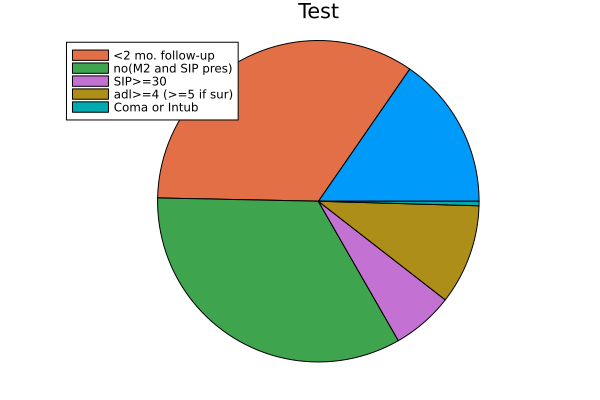

In [6]:
using StatsPlots

value_counts = combine(groupby(df, :sfdm2), nrow => :count)
labels = value_counts.sfdm2   # Etiquetas
values = value_counts.count      # Frecuencias

pie(labels, values, title="Test", autopct="%1.1f%%")

# CORRELATION PLOTS

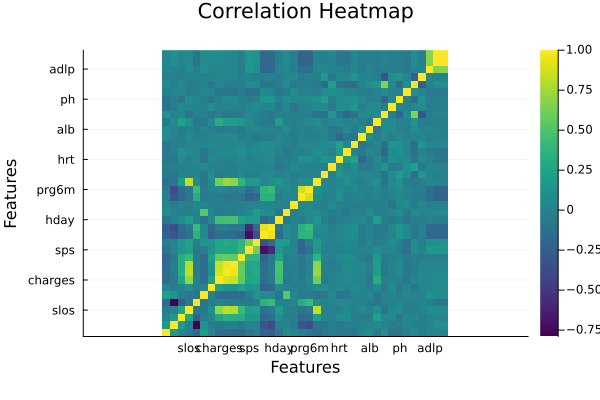

In [24]:
using Statistics

cols = numerical_feats

df_clean = dropmissing(df, cols)

M = cor(Matrix(df_clean[:, cols]))

# Create a correlation heatmap
heatmap(cols, cols, M, 
    title="Correlation Heatmap",
    xlabel="Features",
    ylabel="Features",
    color=:viridis,
    aspect_ratio=:equal)

# Alternative: Correlation plot with correlation values
# corrplot(M, 
#    label=cols,
#    title="Correlation Plot")

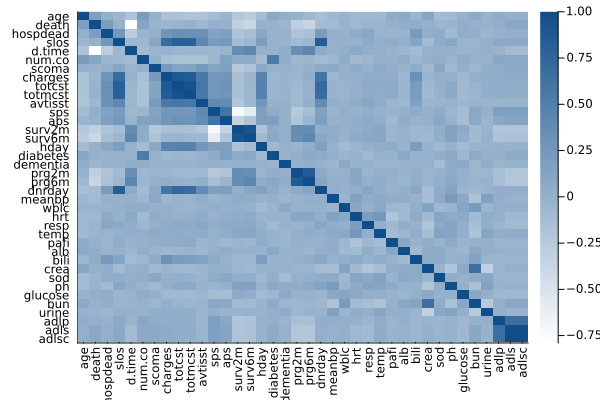

In [33]:
### HEATMAP
cols = numerical_feats              # define subset
df_clean = dropmissing(df[!,cols], cols)
M = cor(Matrix(df_clean))         # correlation matrix
(n,m) = size(M)
heatmap(M, fc=cgrad([:white,:dodgerblue4]), xticks=(1:m,cols), xrot=90, yticks=(1:m,cols), yflip=true)